<a href="https://colab.research.google.com/github/sidra007/f.chollet_practice/blob/main/REUTERS_NEWS_MULTICLASS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **THIS IS A MULTICLASS CLASSIFICATION DATA.THERE ARE 46 DIFFERENT TOPICS EACH HAVING 10 EXAMPLES**

IMPORTING LIBRARIES

In [35]:
import tensorflow as tf
from tensorflow.keras import datasets,models,optimizers,utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOADING DATASET

In [36]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [37]:
len(train_data)

8982

In [38]:
len(test_data)

2246

In [39]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

PREPARING DATA

In [40]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)


ONE HOT ENCODING LABELS

In [41]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


BUILDING MODEL

In [42]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


COMPILATION

In [43]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


SEPARATING VALIDATION DATA FROM TRAIN DATA

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


MODEL FITTING

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 3.1727 - accuracy: 0.3969 - val_loss: 1.7766 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5267 - accuracy: 0.6945 - val_loss: 1.3021 - val_accuracy: 0.7180
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0633 - accuracy: 0.7753 - val_loss: 1.1270 - val_accuracy: 0.7580
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8248 - accuracy: 0.8268 - val_loss: 1.0286 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6478 - accuracy: 0.8703 - val_loss: 0.9487 - val_accuracy: 0.8160
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.5031 - accuracy: 0.8985 - val_loss: 0.9174 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4083 - accuracy: 0.9223 - val_loss: 0.8951 - val_accuracy: 0.8160
Epoch 8/20
16

PLOTTING EPOCHS vs VALIDATION LOSS AND TRAINING LOSS

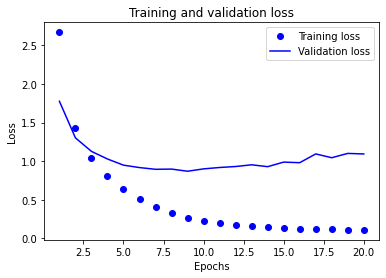

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


PLOTTING EPOCHS Vs VALIDATION ACCURACY AND TRAINING ACCURACY

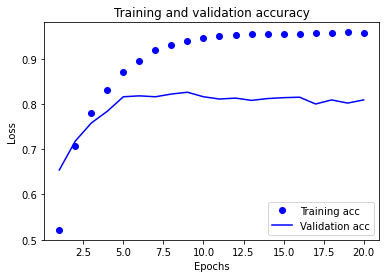

In [47]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


AS WE CAN SEE THAT MODEL STARTS OVERFITTING AFTER 8 EPOCHS THEREFORE WE WILL TRAIN MODEL FOR 8 EPOCHS TO GET BETTER ACCURACY

In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 2s 65ms/step - loss: 3.0399 - accuracy: 0.4316 - val_loss: 1.6952 - val_accuracy: 0.6280
Epoch 2/8
16/16 [==============================] - 1s 53ms/step - loss: 1.4880 - accuracy: 0.6801 - val_loss: 1.2808 - val_accuracy: 0.7180
Epoch 3/8
16/16 [==============================] - 1s 52ms/step - loss: 1.0793 - accuracy: 0.7700 - val_loss: 1.1106 - val_accuracy: 0.7680
Epoch 4/8
16/16 [==============================] - 1s 52ms/step - loss: 0.8298 - accuracy: 0.8214 - val_loss: 1.0522 - val_accuracy: 0.7620
Epoch 5/8
16/16 [==============================] - 1s 52ms/step - loss: 0.6712 - accuracy: 0.8594 - val_loss: 0.9497 - val_accuracy: 0.8060
Epoch 6/8
16/16 [==============================] - 1s 52ms/step - loss: 0.5349 - accuracy: 0.8918 - val_loss: 0.8939 - val_accuracy: 0.8180
Epoch 7/8
16/16 [==============================] - 1s 54ms/step - loss: 0.4194 - accuracy: 0.9138 - val_loss: 0.8731 - val_accuracy: 0.8180
Epoch 8/8
71/71 [===

[1.005964994430542, 0.7782725095748901]

In [50]:
results

[1.005964994430542, 0.7782725095748901]

PREDICTIONS

In [51]:
predictions = model.predict(x_test)


In [52]:
predictions[0].shape

(46,)

In [53]:
np.sum(predictions[0])

0.99999994

In [54]:
np.argmax(predictions[0])


3